# CSMODEL Machine Project (Phase 1) ☕✨
This Jupyter Notebook was made in compliance with the requirements set by the course Statistical Modelling and Simulation (CSMODEL). 

This machine project was prepared by the following students from section S16:
- Filipino, Eunice Marble R.
- Lazaro, Heisel Janine C.
- Punsalan, Emmanuel Gerald G.
- Wee, Justine Erika D.


# Import Libraries ⬇️

The following libraries are imported to provide essential functionalities for data processing, analysis, and visualization throughout this project:

In [14]:
%pip install openpyxl
%pip install scipy
%pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Description ℹ️✨
The [Coffee Bean Sales Dataset](https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset/data) provides comprehensive insights into the coffee industry. It contains detailed information on coffee orders, customer profiles and product details. The dataset is divided into three worksheets, providing specific information about orders, customers and products. The orders worksheet reflects the coffee transactions made by customers. The customers worksheet contains specific details on the customers. Lastly, the products worksheet details each coffee product.

### How the data was collected

The dataset was acquired from [Kaggle](https://www.kaggle.com) which houses datasets that may be from open sources, web scraping, or simulations. It is not outwardly stated how the coffee bean sales dataset was gathered, but it can be assumed that it was artificially generated for educational purposes due to the lack of details and metadata surrounding the orders.

### Potential Implications

As the data was collected through unknown sources, there are potential implications on how information was recorded. The lack of standardization across dataset fields may lead to discrepancies, inconsistencies, or misleading conclusions during data analysis. Additionally, the lack of metadata challenges to determine the scope of the dataset—increasing the risk of sampling bias. It also imposes constraints in preprocessing since the dataset was provided in a pre-cleaned format; hence, further restricting the accuracy and relevance of the insights that will be generated.

### Dataset Overview (Structure and Attributes)

The dataset is divided into three worksheets, which are the following:

**Orders:** Consists of **1,000 observations** and **9 variables**, where each observation represents an order. The attributes of which include:

| **Attribute** | **Description**                              |
|---------------|----------------------------------------------|
| **Order ID**  | A unique identifier for each order           |
| **Order Date**| The date the order was placed                |
| **Customer ID** | A reference to the customer who placed the order |
| **Product ID** | A reference to the product ordered          |
| **Quantity**  | The number of units ordered                  |

**Customers:** Consists of **1,000 observations** and **9 variables**, where each observation represents a distinct customer. The attributes of which include:

| **Attribute**     | **Description**                        |
|-------------------|----------------------------------------|
| **Customer ID**   | A unique identifier for each customer  |
| **Customer Name** | The full name of the customer          |
| **Email Address** | Contact email of the customer          |
| **Phone Number**  | Customer’s phone contact               |
| **Address Line 1**  | Primary street address of the customer |
| **City**            | City of the customer’s address         |
| **Country**         | Country of residence                   |
| **Postcode**        | Postal/ZIP code of the customer’s address |
| **Loyalty Card**    | Indicates whether the customer has a loyalty card (Yes/No) |

**Products:** Consists of **48 observations** and **7 variables**, where each observation represents a unique coffee product. The attributes of which include:

| **Attribute**     | **Description**                                     |
|-------------------|--------------------------------------------------- |
| **Product ID**    | A unique identifier for each product                |
| **Coffee Type**   | The blend or type of coffee (e.g., Arabica, Robusta)|
| **Roast Type**    | The level of roast (e.g., light, medium, dark)      |
| **Size**          | Packaging size of the product                      |
| **Unit Price**    | Retail price per unit                              |
| **Price per 100g**| Standardized pricing for comparison                |
| **Profit**        | Profitability of each product                      |

# Reading the Dataset 📝

With all that in mind, let's load in the dataset!

In [15]:
# Reading the Excel file
file_path = 'Coffee Bean Dataset.xlsx'

# Loading each worksheet into a separate DataFrame
orders = pd.read_excel(file_path, sheet_name = 'orders')
customers = pd.read_excel(file_path, sheet_name = 'customers')
products = pd.read_excel(file_path, sheet_name = 'products')

We should take a peek into the three worksheets to confirm our loading worked...

In [16]:
orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
customers.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [18]:
products.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


Eureka! The Coffee Bean Dataset has loaded into our Notebook.

But each worksheet only gives us partial information about the data... So, let's join the worksheets together to gain more insights!

In [19]:
# Merging Orders with Customers on 'Customer ID'
orders_customers = pd.merge(orders, customers, on = 'Customer ID', how = 'left')

# Merging the result with Products on 'Product ID'
coffee_df = pd.merge(orders_customers, products, on = 'Product ID', how = 'left')

Let's take another peek but now into the merged dataset.

In [20]:
coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name_x,Email_x,Country_x,Coffee Type_x,Roast Type_x,...,City,Country_y,Postcode,Loyalty Card,Coffee Type_y,Roast Type_y,Size_y,Unit Price_y,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,...,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.5970
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,...,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.9075
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,...,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.1655
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,...,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.5125
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,...,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.6491


We're all set! We can now proceed to cleaning the dataset.

# Data Cleaning 🧹✨ 

Before performing analysis, it is essential to clean the dataset so we ensure accuracy and reliability of results. We'll be handling variables and values with **multiple representations**, **incorrect datatypes**, **missing data**, **duplicate data**, **inconsistent formatting**, and **outliers**.

### Multiple Representations

### Incorrect Datatypes

### Missing Data

In [21]:
filtered_df = orders_customers[
    (orders_customers['Loyalty Card'].isin(['Yes', 'No'])) &
    (orders_customers['Quantity'].notnull())
]
filtered_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name_x,Email_x,Country_x,Coffee Type,Roast Type,...,Unit Price,Sales,Customer Name_y,Email_y,Phone Number,Address Line 1,City,Country_y,Postcode,Loyalty Card
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


### Duplicate Data

### Inconsistent Formatting

### Outliers

Our dataset is now squeaky clean! We can now proceed with analysis!

# Target Research Question 🔬✨

#### _`"How can we optimize business strategies by understanding the factors that affect sales?"`_

In order to provide scope, purpose, and clarity, the above question will serve as the main foundation of data analysis upon the Coffee Bean Sale Dataset. It will guide in identifying patterns, relationships, and key insights that can inform business decision-making to hopefully draw insights on the coffee bean industry.

# Exploratory Data Analysis 🔍✨

Now that the dataset has been cleaned, we can start exploring it to better understand its structure, contents, and patterns.

People tend to prefer certain flavors of coffee depending on the season like how Pumpkin Spice Lattes take over Autumn. By knowing which coffee beans and roasts are most profitable, we can make smarter decisions about stocks and promotions. This begs the question...

#### _`"Which coffee bean and roast type is the most profitable per season?"`_ ⛅📈✨

// VISUALIZATION

// What is the total quantity sold for each bean and roast type per season? (*for popularity trend per season)

// Which season (e.g., winter, spring, summer, fall) has the highest overall coffee sales profit?

// INSERT TRANSITIONAL STATEMENT HERE

#### _`"How does loyalty card ownership influence customer purchasing behavior?"`_ 🧑💳✨

This analysis explores whether loyalty card ownership has an influence on customer purchasing behavior.  Specifically, we investigate whether there is a statistically significant difference in the number of coffee bean units ordered by customers who have a loyalty card compared to those who do not.

To do this, we focus on two variables:

- **Loyalty Card**: From the `customers` dataset, indicating whether a customer has a loyalty card (Yes or No).
- **Quantity**: From the `orders` dataset, representing how many units of coffee beans were ordered.

We then divide the dataset into two groups based on loyalty card status:
- `owners`: Customers who have a loyalty card (Loyalty Card == 'Yes')
- `non_owners`: Customers who do not have a loyalty card (Loyalty Card == 'No')

In [22]:
owners = filtered_df[filtered_df['Loyalty Card'] == 'Yes']['Quantity']
non_owners = filtered_df[filtered_df['Loyalty Card'] == 'No']['Quantity']

ownership_table = pd.DataFrame({
    'Loyalty Card Owners': owners.reset_index(drop=True),
    'Non-Owners': non_owners.reset_index(drop=True)
})
ownership_table

,Loyalty Card Owners,Non-Owners
0,2.0,2
1,5.0,2
2,1.0,3
3,3.0,3
4,1.0,1
...,...,...
516,NaN,3
517,NaN,1
518,NaN,5
519,NaN,4


To assess the relationship, we use an **Independent Samples T-test**, which allows us to compare the means of two groups and determine whether any observed difference is statistically significant.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: Loyalty card ownership does not influence purchasing behavior.

**Alternative Hypothesis (Hₐ)**: Loyalty card ownership does influence purchasing behavior.

We will use an independent samples T-test to determine if the difference in purchasing behavior between loyalty card owners and non-owners is statistically significant based on the T-statistic and p-value.

In [23]:
t_stat, p_value = ttest_ind(owners, non_owners, equal_var=False)

print(f"Owners Mean Quantity (Yes): {owners.mean():.2f}")
print(f"Non-Owners Mean Quantity (No): {non_owners.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Owners Mean Quantity (Yes): 3.48
Non-Owners Mean Quantity (No): 3.62
T-statistic: -1.3518
P-value: 0.1768


The average quantity ordered by **loyalty card owners** is **3.48**, while **non-owners** order an average of **3.62**.

The **T-statistic** is **-1.3518**, and the **p-value** is **0.1768**, which is greater than **0.05**. This means the result is **not statistically significant**. 

Therefore, we **fail to reject the null hypothesis**.

The dot plot below further illustrates this relationship.

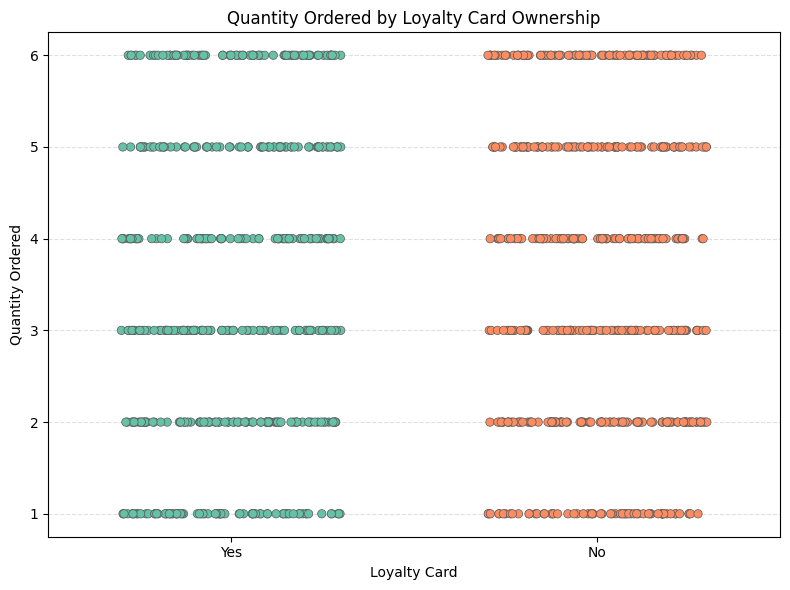

In [24]:
plt.figure(figsize = (8, 6))
sns.stripplot(
    data = filtered_df,
    x = 'Loyalty Card',
    y = 'Quantity',
    hue = 'Loyalty Card',       
    legend = False,             
    jitter = 0.3,
    size = 6,
    marker = 'o',
    edgecolor = 'auto',
    linewidth = 0.5,
    palette = 'Set2'
)

plt.title('Quantity Ordered by Loyalty Card Ownership')
plt.xlabel('Loyalty Card')
plt.ylabel('Quantity Ordered')
plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.4)

plt.tight_layout()
plt.show()

**Figure n.**

The dot plot shows the distribution of coffee bean quantities ordered by customers, grouped by loyalty card ownership. Each dot represents a single transaction, with the quantity ordered on the y-axis and the loyalty card status on the x-axis.

As seen in the figure, loyalty card owners and non-owners display similar ordering patterns. This diagram aligns with the t-test results, which show no significant difference in mean quantity ordered between the groups (t = -1.3518, p = 0.1768).

📌 **Conclusion**: There is no statistically significant evidence that loyalty card ownership influences the quantity of coffee beans ordered.

While our initial analysis suggests that loyalty card ownership does not significantly affect overall purchasing behavior,  it does not directly answer whether those with loyalty cards tend to order larger quantities of coffee beans. A customer may still purchase larger quantites in order.

To further investigate this, we now ask:

**Do loyalty card owners order in larger quantities of coffee beans compared to non-owners?**

To answer this question, we use the same variables from the previous analysis:
- **Loyalty Card**: From the `customers` dataset, indicating whether a customer has a loyalty card (Yes or No).
- **Quantity**: From the `orders` dataset, representing how many units of coffee beans were ordered.

We will also use the same groupings from the initial analysis:
- `owners`: Customers who have a loyalty card (Loyalty Card == 'Yes')
- `non_owners`: Customers who do not have a loyalty card (Loyalty Card == 'No')

To investigate this, we will conduct a **One-tailed Independent Samples T-test** to determine if loyalty card owners purchase in larger amounts compared to non-owners.

Before conducting the test, we define our hypotheses:

**Null Hypothesis (H₀)**: Loyalty card owners do not order in larger quantities than non-owners (μ₁ ≤ μ₂).

**Alternative Hypothesis (Hₐ)**: Loyalty card owners order in larger quantities than non-owners (μ₁ > μ₂).

We will use a One-tailed Independent Samples T-test to determine if loyalty card owners order significantly more coffee beans than non-owners, based on the T-statistic and p-value.

In [25]:
t_stat, p_value_two_tailed = ttest_ind(owners, non_owners, equal_var=False)
p_value_one_tailed = p_value_two_tailed / 2

print(f"Owners Mean Quantity (Yes): {owners.mean():.2f}")
print(f"Non-Owners Mean Quantity (No): {non_owners.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

Owners Mean Quantity (Yes): 3.48
Non-Owners Mean Quantity (No): 3.62
T-statistic: -1.3518
One-tailed P-value: 0.0884


Thhe **One-tailed p-value** is **0.0884**, which is greater than **0.05**. This means the result is **not statistically significant**. 

Therefore, we **fail to reject the null hypothesis**.

This relationship is also shown in the bar plot below.

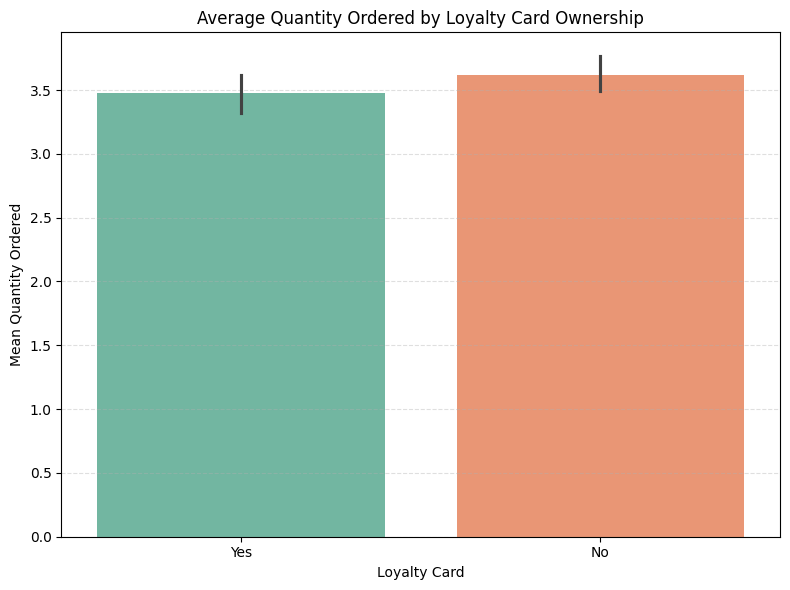

In [26]:
plt.figure(figsize = (8, 6))
sns.barplot(
    data = filtered_df,
    x = 'Loyalty Card',
    y = 'Quantity',
    hue = 'Loyalty Card',   
    palette = 'Set2',
    legend = False          
)
plt.title("Average Quantity Ordered by Loyalty Card Ownership")
plt.xlabel("Loyalty Card")
plt.ylabel("Mean Quantity Ordered")
plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.4)
plt.tight_layout()
plt.show()

**Figure n.**

The bar plot displays the average quantity of coffee beans ordered by customers, grouped by loyalty card ownership. Each bar represents the mean quantity ordered for each group.

As shown above, loyalty card owners do not appear to order larger quantities than non-owners. It supports the one-tailed t-test result, which found no significant evidence to support the claim that loyalty card owners order in greater quantities (t = -1.3518, one-tailed p = 0.0884).

📌 **Conclusion**: There is insufficient evidence to conclude that loyalty card owners order in larger quantities of coffee beans compared to non-owners.

// T TEST

// DOT PLOT

// Do loyalty card owners order in bigger quantities of coffee beans compared to non-owners?

// INSERT TRANSITIONAL STATEMENT HERE

#### _`"Do the coffee products with higher unit prices generate more profit?"`_ ☕💰✨

// PEARSON CORRELATION

// Which product types are priced higher but have negative or low profits? 

// Do sales volumes influence total profit for higher-priced products?

# Conclusion ✅

// INSERT CONCLUSION HERE